In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../calibration/out/C.mat'
DATA_FILE = '../../../experiment_data/blue_feet/4/2016.10.02_21.42.51_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2016/10/2  21:42:51
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



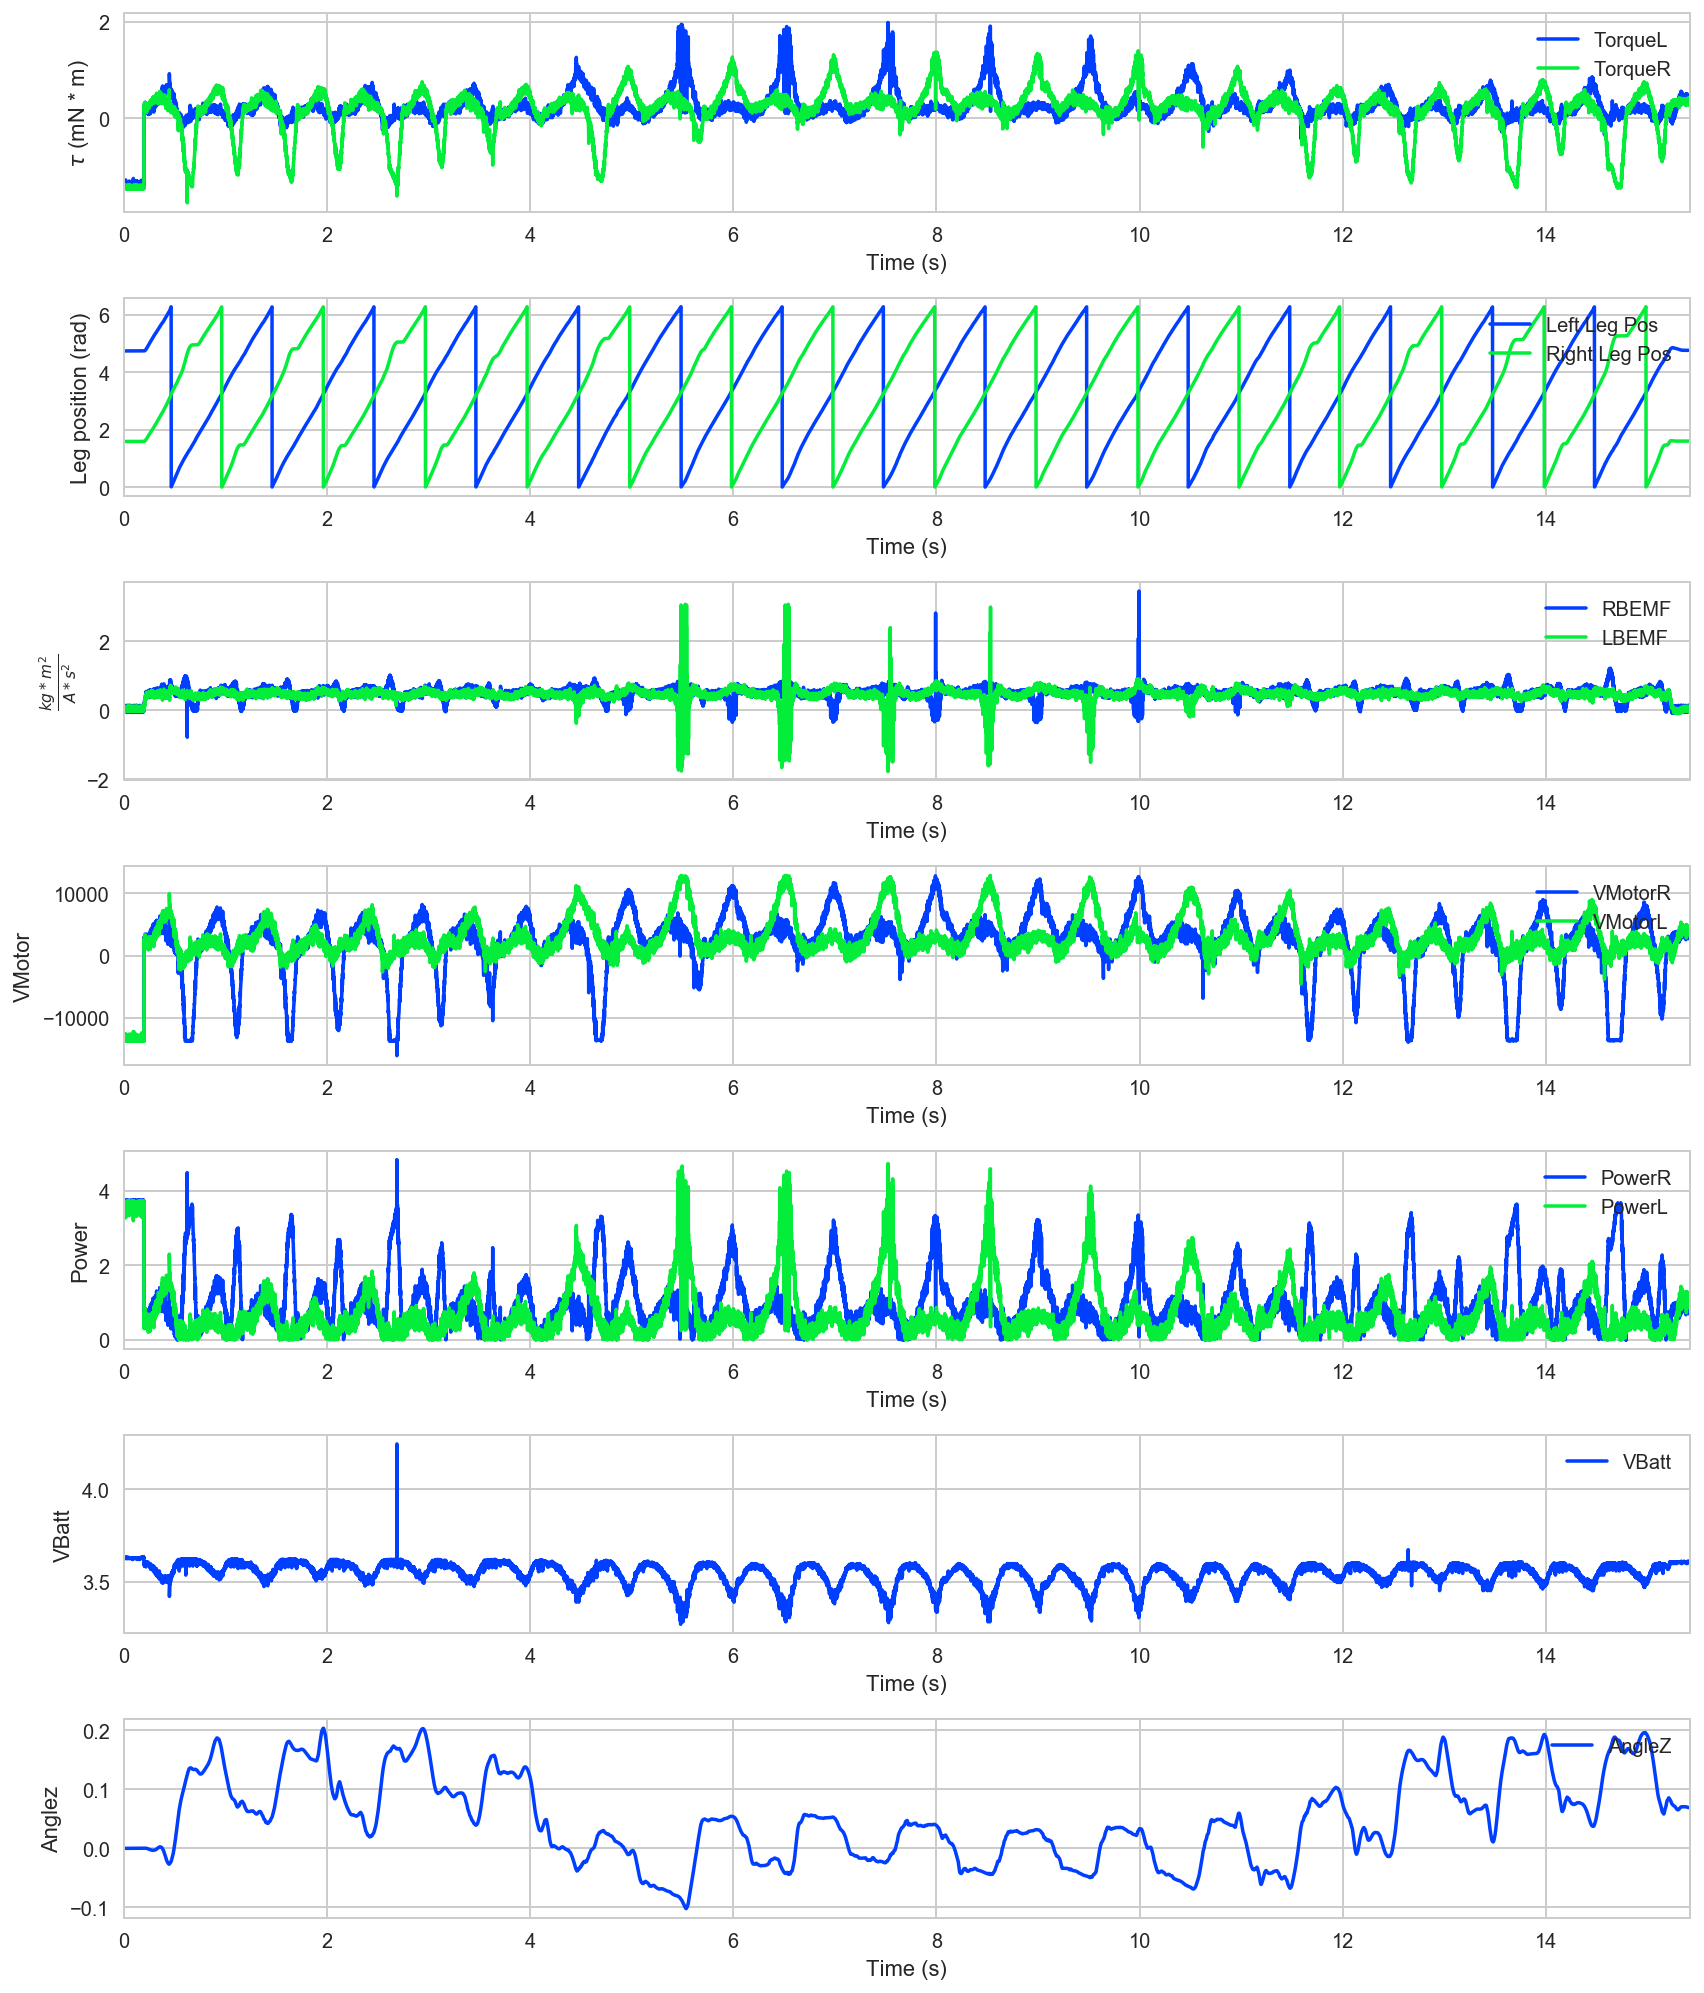

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

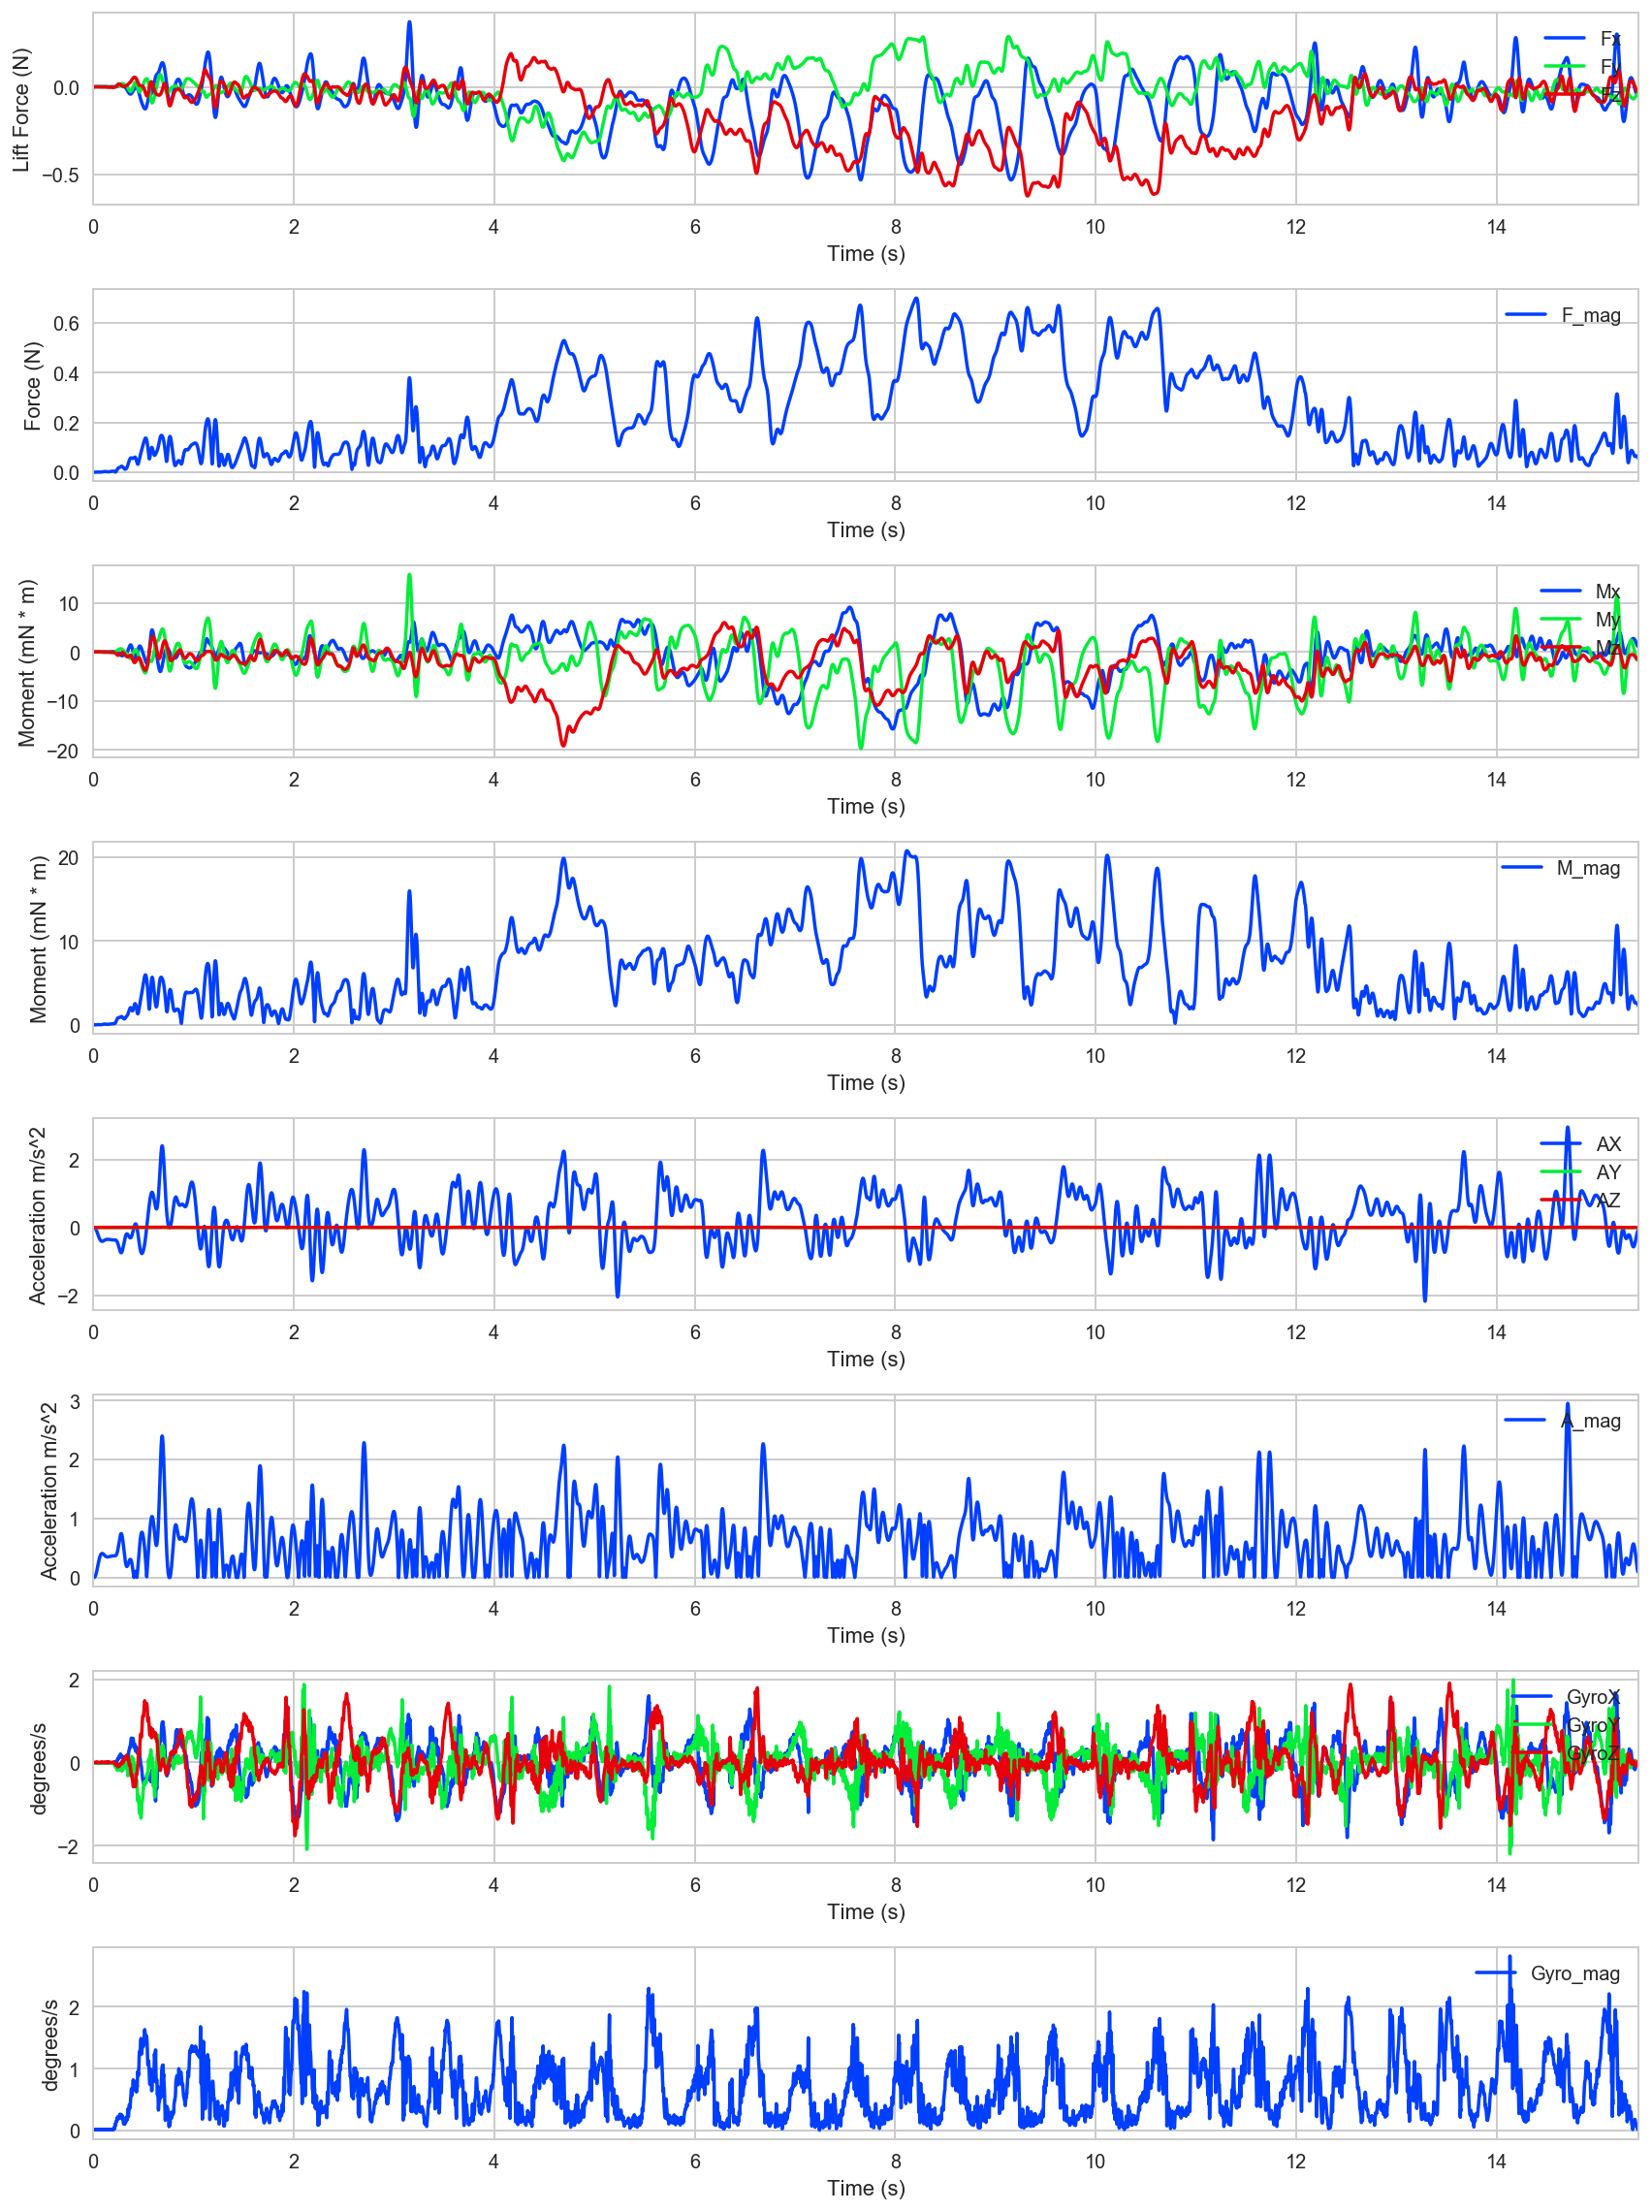

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

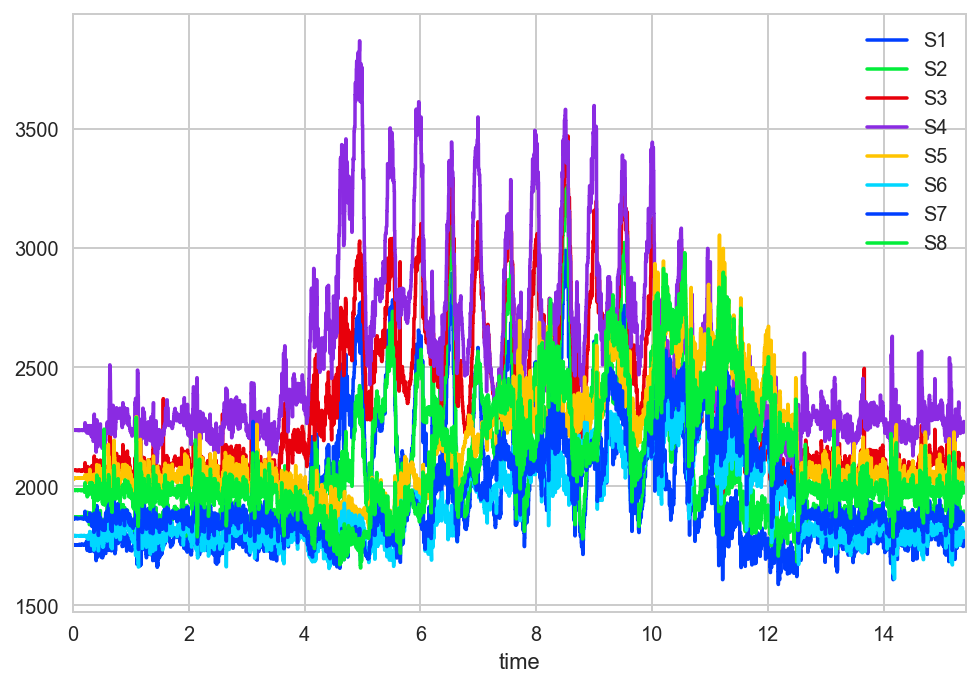

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
print "Here is the cost of transport for inside flaps"
cot = utils.cost_of_transport_inside_flaps(df, has_bottom_shell=False, v_avg=5.715/100.,
                                           start_time=7000, end_time=11000, same_power_across_experiments=0)
print cot


Here is the cost of transport for inside flaps
power:1.82878939163
44.5166842186


In [8]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=7000,end_time=11000)
print drag

drag energy (kg*cm^2/s^2): 413.447699641
0.0413447699641


In [9]:
out_drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=500,end_time=3000)
print out_drag

drag energy (kg*cm^2/s^2): 32.3267274691
0.00323267274691


In [10]:
import numpy as np
start = df['Right Leg Pos'][6500:7500].argmax()
end = df['Right Leg Pos'][10500:11500].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

6973 10964
6.27973419772
6.2789674058
[[ 6973  7973]
 [ 7973  8973]
 [ 8973  9973]
 [ 9973 10973]]


In [11]:
cots = utils.get_cost_of_transport_from_list(df,False,v_avg=5.715/100.,intervals=intervals)
print cots

power:1.85723732182
power:1.8928363917
power:1.89603477594
power:1.70501977681
[45.209168290665609, 46.075726550265522, 46.153582131528559, 41.50386443520209]


In [12]:
drags = utils.get_drag_energy_from_list(df, False, intervals)
print drags

drag energy (kg*cm^2/s^2): 145.093540869
drag energy (kg*cm^2/s^2): 116.443175774
drag energy (kg*cm^2/s^2): 109.947110631
drag energy (kg*cm^2/s^2): 42.5619440471
[0.014509354086931476, 0.011644317577440104, 0.010994711063107772, 0.004256194404708931]
